# Problem Statement -

Plot AUC-ROC curve using different machine learning algorithms 

Dataset Description -

Non-alcohol fatty liver disease (NAFLD) Data set contains the data from a population study of non-alcoholic fatty liver disease (NAFLD). Subjects with the condition and a set of matched control subjects were followed forward for metabolic conditions, cardiac endpoints, and death.


id	   subject identifier

age	   age at entry to the study

male	   0=female, 1=male

weight   weight in kg

height   height in cm

bmi	   body mass index

case.id  the id of the NAFLD case to whom this subject is matched

futime   time to death or last follow-up

status   0= alive at last follow-up, 1=dead

#AUC - Area Under Curve
#ROC - Receiver Operating Characteristic 
#AUC-ROC curve helps us visualize how well our machine learning classifier performs.

#Lets understand the confusion matrix -
#lets understand with an example 
#True Positive(TP): Images which are cat and actually predicted cat
#True Negative(TN): Images which are not-cat and actually predicted not-cat
#False Positive(FP): Images which are not-cat and actually predicted as cat
#False Negative(FN): Images which are cat and actually predicted as not-cat
#predict_proba gives you the probabilities for the target (0 and 1 in our case) in array form

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/home/vanchhit/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
df=pd.read_csv("/home/vanchhit/Downloads/nafld1.csv")

In [3]:
df.head()

,Unnamed: 0,id,age,male,weight,height,bmi,case.id,futime,status
0,3631,1,57,0,60.0,163.0,22.690939,10630.0,6261,0
1,8458,2,67,0,70.4,168.0,24.884028,14817.0,624,0
2,6298,3,53,1,105.8,186.0,30.453537,3.0,1783,0
3,15398,4,56,1,109.3,170.0,37.830100,6628.0,3143,0
4,13261,5,68,1,NaN,NaN,NaN,1871.0,1836,1


In [4]:
df=df.drop(columns=["Unnamed: 0","id","case.id"])

In [5]:
df.head()

,age,male,weight,height,bmi,futime,status
0,57,0,60.0,163.0,22.690939,6261,0
1,67,0,70.4,168.0,24.884028,624,0
2,53,1,105.8,186.0,30.453537,1783,0
3,56,1,109.3,170.0,37.830100,3143,0
4,68,1,NaN,NaN,NaN,1836,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17549 entries, 0 to 17548
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     17549 non-null  int64  
 1   male    17549 non-null  int64  
 2   weight  12763 non-null  float64
 3   height  14381 non-null  float64
 4   bmi     12588 non-null  float64
 5   futime  17549 non-null  int64  
 6   status  17549 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 959.8 KB


In [7]:
df.isnull().sum()

age          0
male         0
weight    4786
height    3168
bmi       4961
futime       0
status       0
dtype: int64

In [8]:
df["weight"]=df["weight"].fillna(df["weight"].mean())
df["height"]=df["height"].fillna(df["height"].mean())
df["bmi"]=df["bmi"].fillna(df["bmi"].mean())

In [9]:
df.isnull().sum()

age       0
male      0
weight    0
height    0
bmi       0
futime    0
status    0
dtype: int64

<AxesSubplot:>

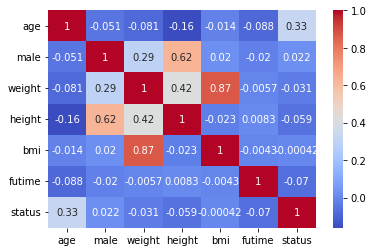

In [10]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

In [11]:
X=df.drop(columns=["status"])
y=df[["status"]]

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [14]:
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb.fit(x_train,y_train)

/home/vanchhit/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [15]:
from sklearn.svm import SVC
svm=SVC(probability=True)
svm.fit(x_train,y_train)

/home/vanchhit/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(probability=True)

In [16]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [17]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

/home/vanchhit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier()

In [18]:
#Predicting the probability when person is dead
nb_probs= nb.predict_proba(x_test)[:,1]
svc_probs= svm.predict_proba(x_test)[:,1]
dt_probs= dtc.predict_proba(x_test) [:,1]
rf_probs= rfc.predict_proba(x_test) [:,1]

#AUC (or, better, AUROC) is just the area underneath the entire ROC curve and 
#is always represented as a value between 0 to 1. Our aim is to maximize this number as this means that we have the highest TPR and lowest FPR for a threshold.

#roc_auc_score is defined as the area under the ROC curve, which is the curve having
#False Positive Rate on the x-axis and True Positive Rate on the y-axis at all classification thresholds

In [21]:
from sklearn.metrics import roc_auc_score
nb_auc= roc_auc_score(y_test,nb_probs)
svc_auc= roc_auc_score(y_test,svc_probs)
dt_auc= roc_auc_score(y_test,dt_probs)
rf_auc= roc_auc_score(y_test,rf_probs)

In [22]:
from sklearn.metrics import roc_curve
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, threshold = roc_curve(y_test, random_probs)

In [23]:
print("Naive Bayes:Area under ROC = %0.2f" %nb_auc)
print("Support Vector Machine:Area under ROC = %0.2f" %svc_auc)
print("Decision tree:Area under ROC=%0.2f" %dt_auc)
print("Random forest:Area under ROC=%0.2f" %rf_auc)

Naive Bayes:Area under ROC = 0.82
Support Vector Machine:Area under ROC = 0.70
Decision tree:Area under ROC=0.62
Random forest:Area under ROC=0.80


In [24]:
nb_fpr,nb_tpr,thresholds=roc_curve(y_test,nb_probs)
svc_fpr,svc_tpr,thresholds=roc_curve(y_test,svc_probs)
dt_fpr,dt_tpr,thresholds=roc_curve(y_test,dt_probs)
rf_fpr,rf_tpr,thresholds=roc_curve(y_test,rf_probs)

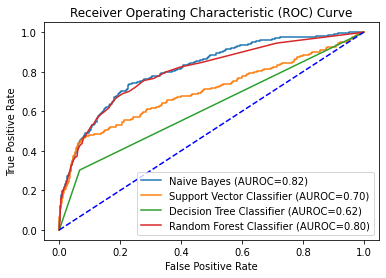

In [25]:
plt.plot(nb_fpr,nb_tpr, label="Naive Bayes (AUROC=%0.2f)"%nb_auc)
plt.plot(svc_fpr,svc_tpr, label="Support Vector Classifier (AUROC=%0.2f)"%svc_auc)
plt.plot(dt_fpr,dt_tpr, label="Decision Tree Classifier (AUROC=%0.2f)"%dt_auc)
plt.plot(rf_fpr,rf_tpr, label="Random Forest Classifier (AUROC=%0.2f)"%rf_auc)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()

#AUC - ROC Curve
#It is the plot of sensitivity vs 1-specificity
#sensitivity is positive recall - Out of positive samples how many samples was my classifier able to pick up
#Also known as true positive rate (TPR) =tp/tp+fn